#### Projeção gráfica com a solução da equação de Schrodinger mediante a um potencial harmônico

O conceito harmônico é frequentemente usado nas práticas de sistemas quânticos, portanto é um bom utilitário para estudos. Para a construção da solução devemos saber que o potêncial harmônico se da:

$$V(x) = \frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

transformando a equação, unidimensional, de Schrodinger:

$$H = \frac{-\hbar^{2}}{2m}\frac{d^{2}}{{dx}^{2}}+\frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

A partir do método analítico relatado por David Griffiths no livro base de Mecânica Quântica, podemos representar a solução com polinômios de Hermite $H_n(x)$ de forma que a função de onda pode ser representada como:

$$\psi_n(x)=(\frac{m\omega}{\pi\hbar})^{1/4}\cdot\frac{1}{\sqrt{2^n\cdot n!}} \cdot H_n(x)e^{-x^{2}/2}$$

e $H_n(x)$ pode ser tabelado como:

$$H_0=1$$
$$H_1=2x$$
$$H_2=4x^{2}-2$$
$$H_3=8x^{3}-12$$
$$.$$
$$.$$
$$.$$

Por fim, para que possamos entender todo processo que circunda a função de onda, devemos desenhá-la a partir da sua representação quadrática, sua densidade.

In [24]:
# A biblioteca de plotagem de gráficos do python
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sympy import *
from scipy.integrate import trapz

%matplotlib inline

import ipywidgets as widgets
from IPython.display import display

from scipy.special import hermite
from math import factorial

In [69]:
# Definição do fator que multiplica o polinômio de Hermite, consideraremos que a massa da partícula é 1, 
# bem com a constante verdadeira de planck e o omega pertencente a equação, isso é possível porque o
# tamanho desses fatores são pequenos o suficiente para não serem necessários para a análise.

def N(n):
    return (1./np.pi)**(1/4)*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

In [70]:
# Processo de integração numérica usando o método dos trapézios

x=np.linspace(-10,10,1000) # Espaçamento

psiquad=psi(5,x)**2

Integral = trapz(psiquad,x)

print(Integral)

0.564189583547757


In [71]:
# v é a variação do grau do polinômio de Hermite, x é a variável polinomial, comumente representado por epsilon 

@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y=psi(v,x)**2
    
    plt.plot(x,y,lw=2) # Lineweight
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)

interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

Para concretizar o resultado total da função de onda, devemos integrar a variação em tempo no nosso resultado com a exponencial:

$$e^{-i(n+1/2)\omega t}$$

tornando a função de onda variante em t, $\psi(x,t)$.

In [94]:
# Bibliotecas 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [97]:
# Equação com o adicional da exponencial

def psixt(n, x, t):
    Hn=hermite(n)
    a = complex(1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(-a*(n+1/2)*t)
    return Pxt

In [98]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y) # Matriz gerada em um linspace, por exemplo, um linspace de 0 a 1 em x resulta emarray([[0. , 0.5, 1. ], [0. , 0.5, 1. ]])
Z = psixt(0, X, Y)**2

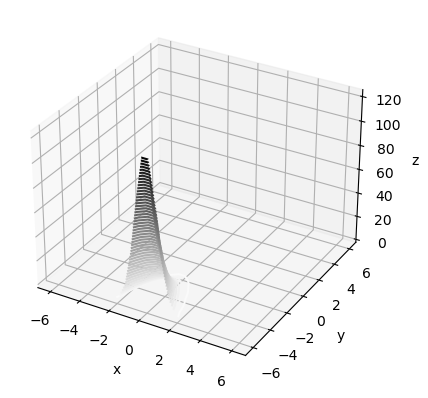

In [99]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [106]:
@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    Z=psixt(v,X,Y)**2
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('t',fontsize=16)

interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…